In [101]:
import numpy as np
class Perceptron(object):
	def __init__(self, eta = 0.01, n_iter=10):
		self.eta = eta
		self.n_iter = n_iter
	def fit(self, X, y):
		self.w_ = np.zeros(1+X.shape[1])
		print self.w_[1:], X[0]
		self.errors_ = []
		for _ in range (self.n_iter):
			errors = 0
			for xi, target in zip(X, y):
				update = self.eta*(target - self.predict(xi))               
				self.w_[1:] += update*xi
				self.w_[0] += update
				errors += int(update != 0.0)
			self.errors_.append(errors)
		return self
		
	def net_input(self, X):
		return np.dot(X, self.w_[1:])+self.w_[0]
	def predict(self, X):
		return np.where(self.net_input(X) >= 0.0, 1, -1)		

In [102]:
>>> import pandas as pd

In [103]:
>>> df = pd.read_csv('https://archive.ics.uci.edu/ml/' 'machine-learning-databases/iris/iris.data', header=None)

In [104]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [105]:
>>> import matplotlib.pyplot as plt

In [106]:
>>> y = df.iloc[0:100, 4].values

In [107]:
>>> y = np.where(y == 'Iris-setosa', -1, 1)

In [108]:
>>> X = df.iloc[0:100, [0, 2]].values

In [109]:
>>> plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')

In [110]:
>>> plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')

In [111]:
>>> plt.xlabel('petal length')

In [112]:
>>> plt.ylabel('sepal length')

In [113]:
>>> plt.legend(loc='upper left')

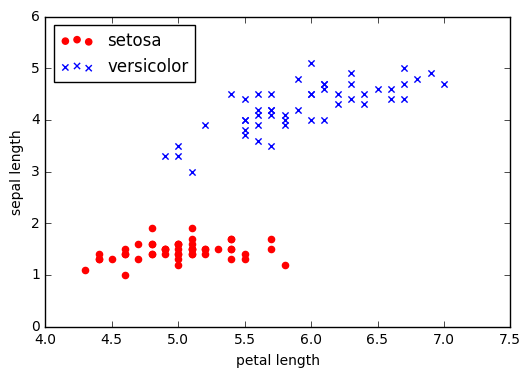

In [114]:
plt.show()

In [115]:
>>> ppn = Perceptron(eta=0.1, n_iter=10)

In [116]:
>>> ppn.fit(X, y)

[ 0.  0.] [ 5.1  1.4]


In [117]:
>>> plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker = 'o')

In [118]:
plt.xlabel('Epochs')

In [119]:
plt.ylabel('Number of miscalculations')

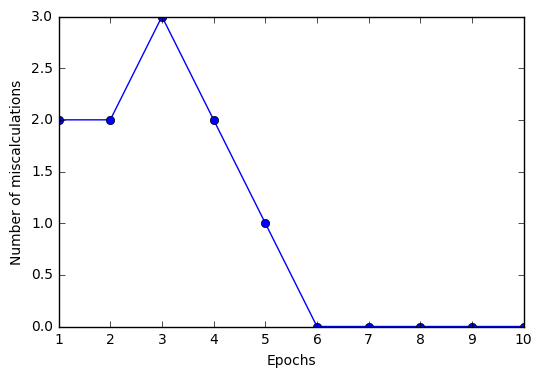

In [120]:
plt.show()

In [121]:
from matplotlib.colors import ListedColormap

In [147]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1
    x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max,resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)                       
    

In [142]:
>>> plot_decision_regions(X, y, classifier=ppn)

In [143]:
>>> plt.xlabel('sepal length [cm]')

In [144]:
>>> plt.ylabel('petal length [cm]')

In [145]:
>>> plt.legend(loc='upper left')

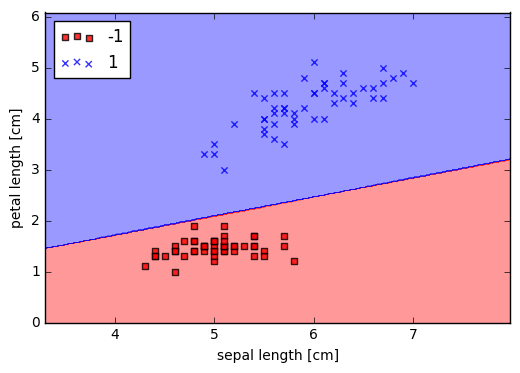

In [146]:
>>> plt.show()